### Clustering Algorithms:

- KMeans
- Kmeans++ ( do smart intialization)
- GMM (Kmeans cant be used when the cluster shape is not globular)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [59]:

df = pd.read_csv(r"C:\Users\kanwar\Downloads\E-commerce.csv")
df.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


In [60]:
df.shape

(2500, 7)

In [61]:
df_copy=df.copy()

## KMeans Animation
- http://tech.nitoyon.com/en/blog/2013/11/07/k-means/
- https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

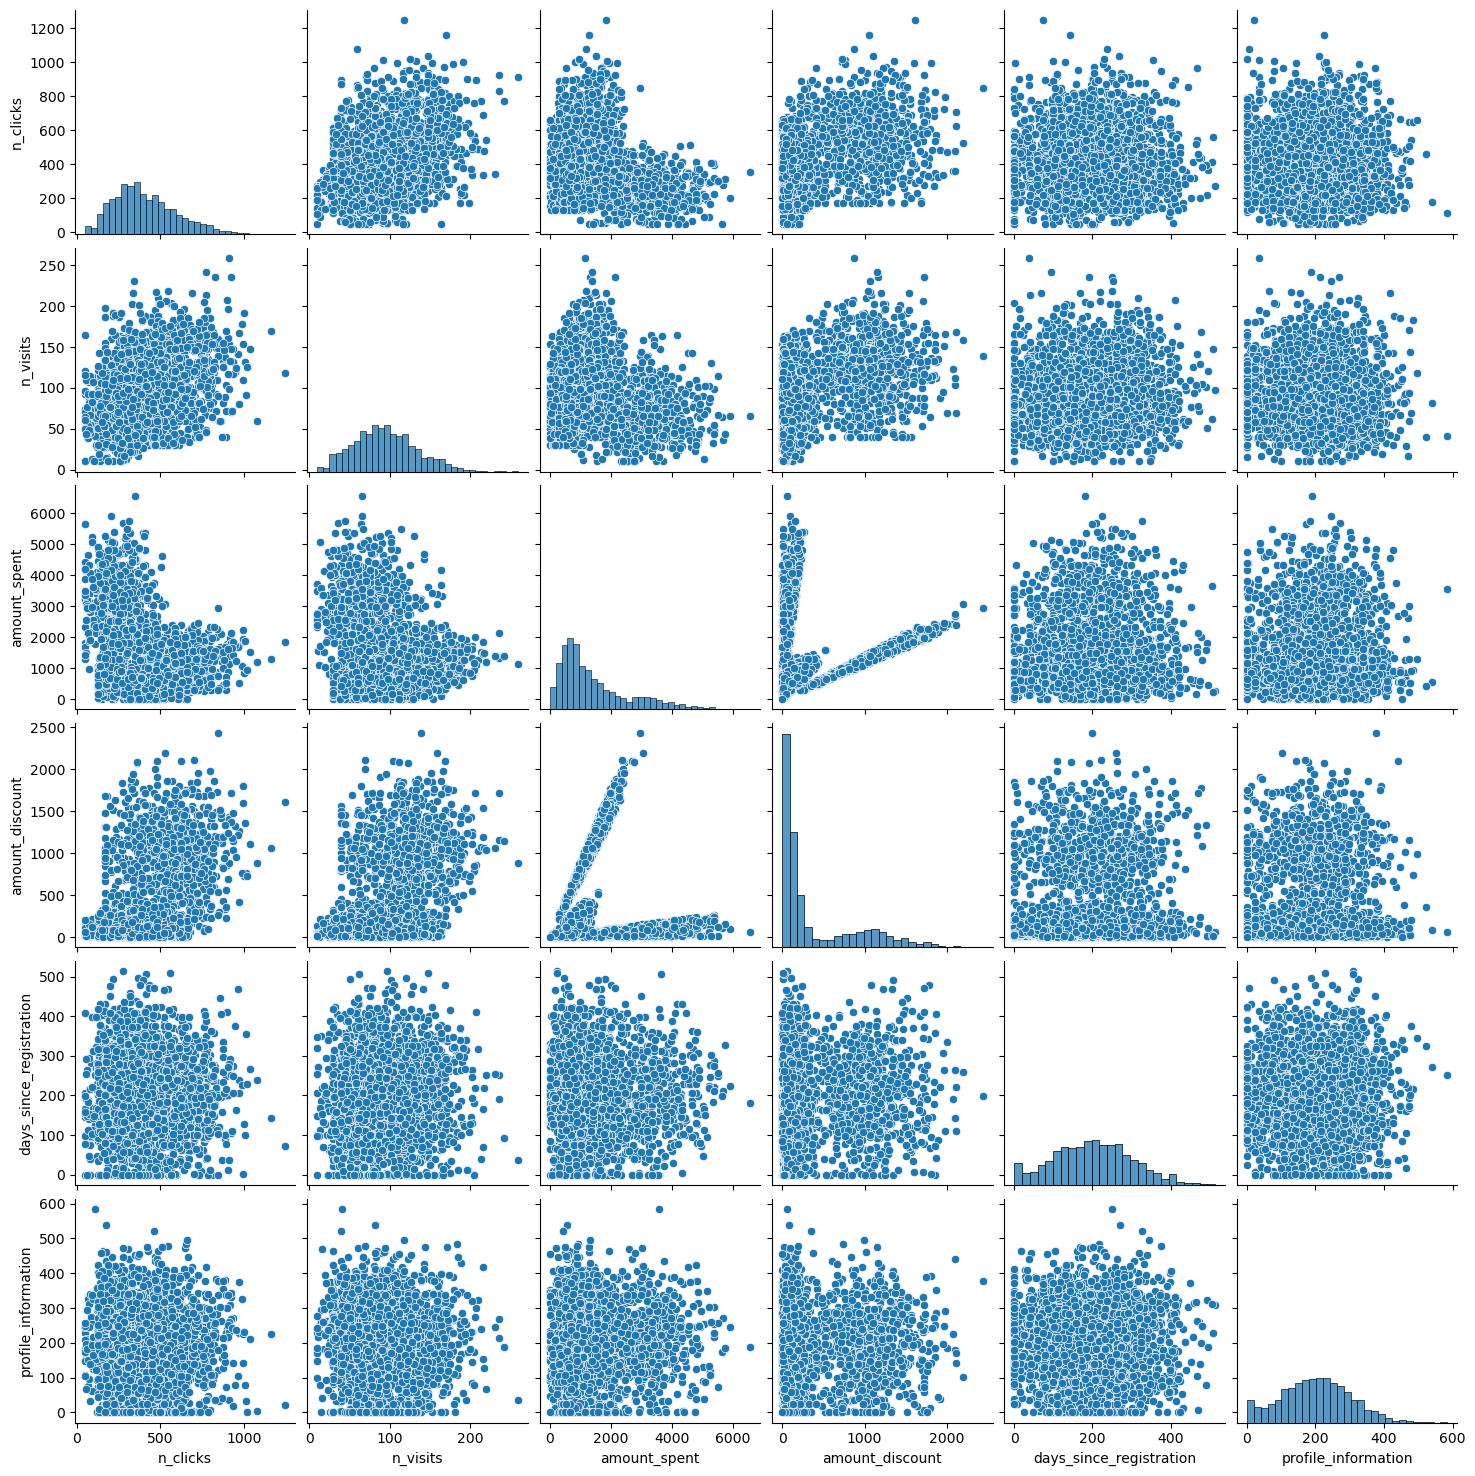

In [5]:
sns.pairplot(df.drop(columns='ID'))

In [62]:
df = df.drop(columns = ['ID'])
df.head()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,130,65,213.905831,31.600751,233,235
1,543,46,639.223004,5.689175,228,170
2,520,102,1157.402763,844.321606,247,409
3,702,83,1195.903634,850.041757,148,200
4,221,84,180.754616,64.283300,243,259


In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df)
X.shape

(2500, 6)

In [64]:
X = pd.DataFrame(X,columns=df.columns)

X.head()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,-1.495250,-0.758535,-1.054611,-0.732800,0.323118,0.339192
1,0.720691,-1.247488,-0.690292,-0.786002,0.272672,-0.310034
2,0.597285,0.193635,-0.246428,0.935872,0.464365,2.077120
3,1.573801,-0.295317,-0.213449,0.947616,-0.534456,-0.010392
4,-1.006992,-0.269583,-1.083008,-0.665697,0.424009,0.578906


In [65]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

X_embedded = pca.fit_transform(X)


print(X_embedded.shape)

(2500, 2)


C:\Users\kanwar\anaconda3\Lib\site-packages\matplotlib\collections.py:1121: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


<Figure size 640x480 with 0 Axes>

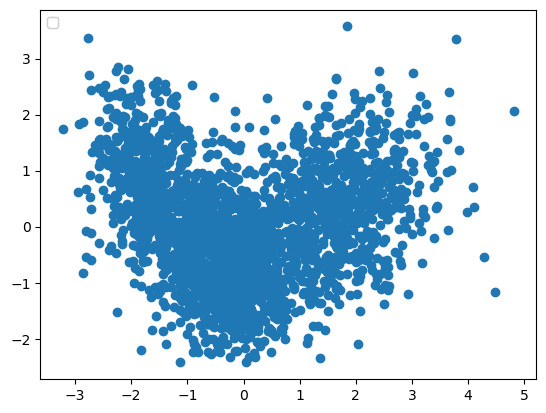

In [66]:
plt.set_cmap('tab10')

fig, ax = plt.subplots()
scatter = ax.scatter(X_embedded[:,0],X_embedded[:,1])

legend = ax.legend(*scatter.legend_elements(),loc="upper left")
ax.add_artist(legend)

plt.show()
plt.close()

In [67]:
from sklearn.manifold import TSNE

X_embedded = TSNE().fit_transform(X)

print(X_embedded.shape)

(2500, 2)


plt.set_cmap('tab10')

fig, ax = plt.subplots()
scatter = ax.scatter(X_embedded[:,0],X_embedded[:,1])

legend = ax.legend(*scatter.legend_elements(),loc="upper left")
ax.add_artist(legend)

plt.show()
plt.close()

In [19]:
### 3 Clusters looks good to start with

In [68]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)  # centroid location....

KMeans(n_clusters=4, random_state=0)

In [37]:
kmeans.cluster_centers_

array([[-0.84489356, -0.69074277,  1.53258215, -0.6338525 , -0.03015834,
         0.14114355],
       [-0.152689  , -0.13332478, -0.68014351, -0.50785254,  0.00457148,
        -0.05584233],
       [ 1.12538466,  1.38032559, -0.17703977,  1.20693675,  0.02635991,
         0.6705825 ],
       [ 0.82695384,  0.27435098,  0.02897407,  1.62630936,  0.0081634 ,
        -0.66345728]])

In [29]:
kmeans.labels_ # (X)

array([0, 0, 3, ..., 1, 2, 3], dtype=int32)

In [69]:
labels = kmeans.labels_

In [70]:
df['kmeans'] = labels
df.head()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information,kmeans
0,130,65,213.905831,31.600751,233,235,1
1,543,46,639.223004,5.689175,228,170,1
2,520,102,1157.402763,844.321606,247,409,2
3,702,83,1195.903634,850.041757,148,200,3
4,221,84,180.754616,64.283300,243,259,1


<Figure size 640x480 with 0 Axes>

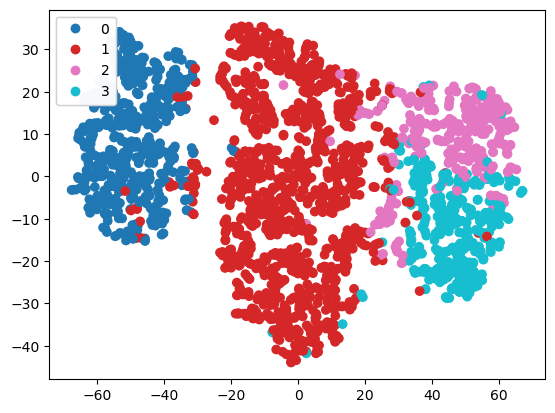

In [71]:
plt.set_cmap('tab10')

fig, ax = plt.subplots()
scatter = ax.scatter(X_embedded[:,0],X_embedded[:,1],c= labels)

legend = ax.legend(*scatter.legend_elements(),loc="upper left")
ax.add_artist(legend)

plt.show()
plt.close()

In [42]:
df['kmeans'].value_counts()

kmeans
1    1228
0     577
3     359
2     336
Name: count, dtype: int64

In [41]:
df.groupby('kmeans').mean()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
kmeans,,,,,,
0,251.211438,67.634315,3234.272996,79.792978,197.984402,215.171577
1,380.222313,89.294788,651.070865,141.160821,201.426710,195.449511
2,618.425595,148.113095,1238.409226,976.342993,203.586310,268.178571
3,562.805014,105.136490,1478.915938,1180.596965,201.782730,134.615599


In [35]:
## As group 0 and group 1 seems very similar can be grouped together hence we can go with n_clusters=3

In [ ]:
# for k in range(1, 11):
    # check the dunn index
    # https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.davies_bouldin_score.html

In [39]:
from sklearn.metrics import davies_bouldin_score as dbc

In [40]:
dbc(X,df['kmeans'])

np.float64(1.2817957869735137)

In [41]:
#The minimum score is zero, with lower values indicating better clustering.
# dun_index=min(inter cluster distance)/max(intra cluster distance)

In [46]:
score=[]
for i in range(2,5):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)  # centroid location....
    labels = kmeans.labels_
    score.append(dbc(X,labels))

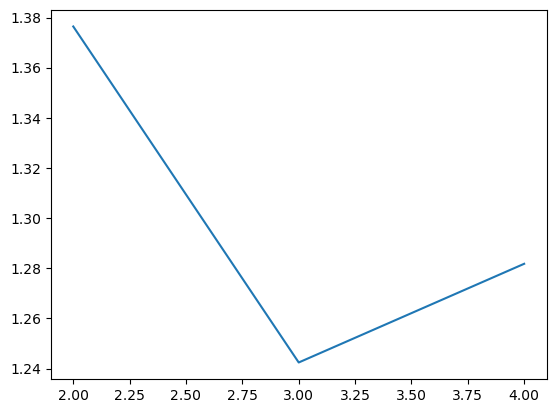

In [47]:
plt.plot(range(2,5),score)

In [48]:
score

[np.float64(1.3764241480294046),
 np.float64(1.2424428121012676),
 np.float64(1.2817957869735137)]

In [49]:
### Elbow Plot: WCSS- Within Cluster sum of squares
wcss=[]
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)  # centroid location....
    labels = kmeans.labels_
    wcss.append(kmeans.inertia_) 

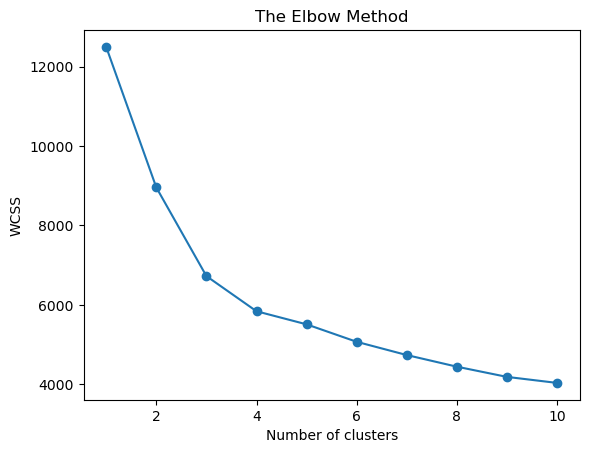

In [54]:
plt.plot(range(1,11),wcss,'-o')
plt.xticks()
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS');

In [55]:
## There is no significant difference in the wcss after numb of clusters=3

In [43]:
from sklearn.manifold import TSNE
tsne = TSNE()

X_embedded = tsne.fit_transform(X)
X_embedded.shape

(2500, 2)

In [44]:
clusters = pd.DataFrame(X_embedded, columns = ['x1', 'x2' ])
clusters.head()

,x1,x2
0,-15.922939,5.951376
1,-9.185535,12.756983
2,34.746590,10.703995
3,46.636509,-22.345158
4,-9.349136,5.257360


In [72]:
    kmeans = KMeans(n_clusters=3, random_state=0)
    kmeans.fit(X)  # centroid location....
    labels = kmeans.labels_

In [73]:
clusters['kmeans'] = labels
clusters.head()

,x1,x2,kmeans
0,-15.922939,5.951376,1
1,-9.185535,12.756983,1
2,34.746590,10.703995,2
3,46.636509,-22.345158,2
4,-9.349136,5.257360,1


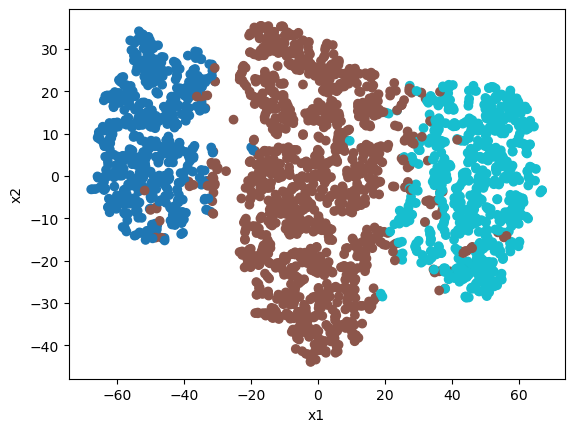

In [74]:
plt.scatter(clusters['x1'], clusters['x2'], c=clusters['kmeans'])
plt.xlabel('x1')
plt.ylabel('x2');

In [75]:
    kmeans = KMeans(n_clusters=3, init='k-means++',random_state=0)
    kmeans.fit(X)  # centroid location....
    labels = kmeans.labels_

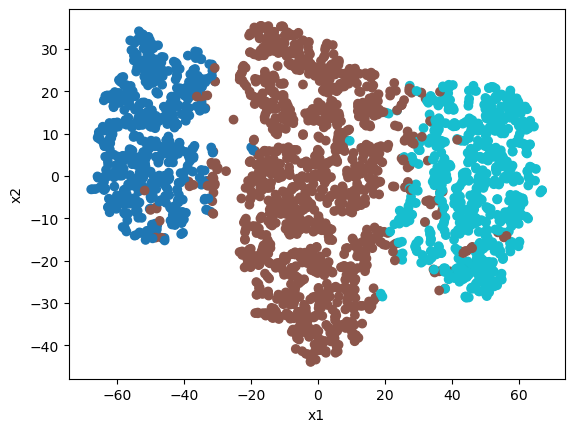

In [76]:
plt.scatter(clusters['x1'], clusters['x2'], c=clusters['kmeans'])
plt.xlabel('x1')
plt.ylabel('x2');

k-means++ do smart initialization: ist centroid is random, the next centroid are selected based on their distance from the centroid. 
Not just the farthest point is selected but the point with more cumulative probability

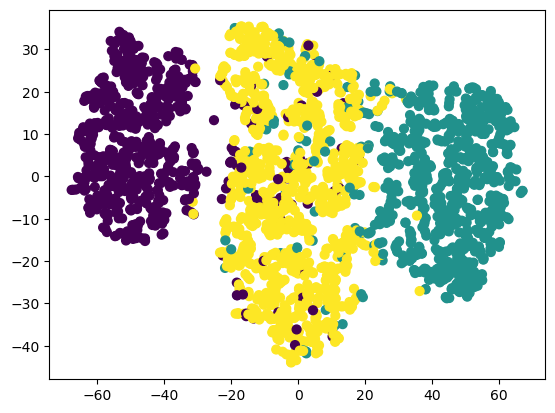

In [77]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
labels = gmm.predict(X)
plt.scatter(clusters['x1'], clusters['x2'], c  = labels, s = 40, cmap = 'viridis');

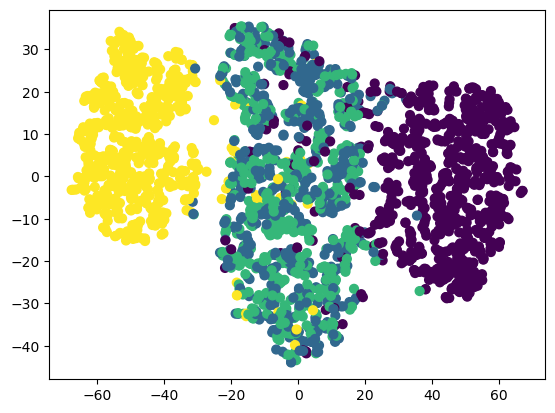

In [78]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(X)
labels = gmm.predict(X)
plt.scatter(clusters['x1'], clusters['x2'], c  = labels, s = 40, cmap = 'viridis');